In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [ ]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

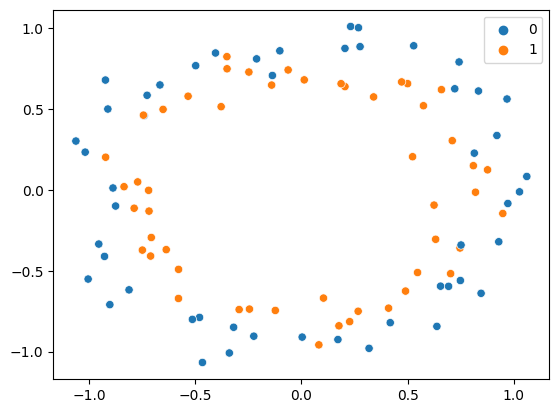

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [ ]:
model = Sequential()

model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

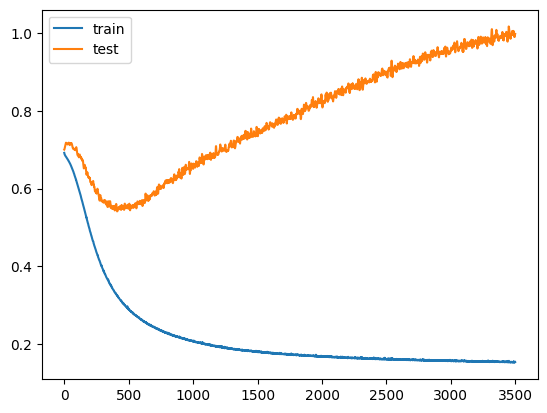

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 8s 843us/step


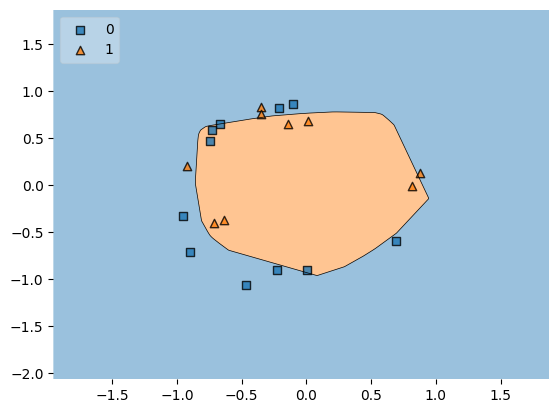

In [ ]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

Using early stopping

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta = 0.00001,
    patience = 20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 28ms/step - loss: 0.6804 - accuracy: 0.5500 - val_loss: 0.7095 - val_accuracy: 0.4000
Epoch 2/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6797 - accuracy: 0.5625 - val_loss: 0.7094 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6791 - accuracy: 0.5625 - val_loss: 0.7098 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6785 - accuracy: 0.5625 - val_loss: 0.7100 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 11ms/step - loss: 0.6782 - accuracy: 0.5500 - val_loss: 0.7105 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6772 - accuracy: 0.5500 - val_loss: 0.7111 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6765 - accuracy: 0.5625 - val_loss: 0.7108 - val_accuracy: 0.4000
Epoch 8/3500


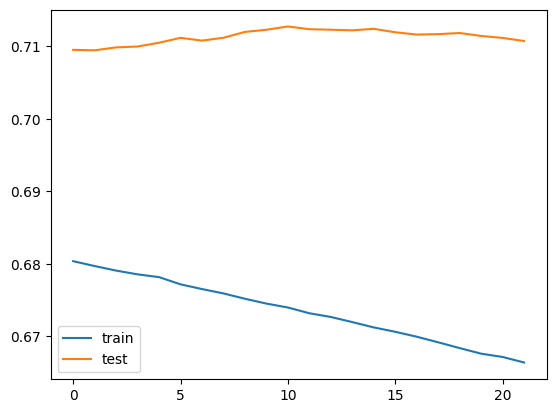

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()